In [2]:
#Import Dependencies
import pandas as pd
import numpy as np 

# data visualization
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns

# Algorithms
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_predict,StratifiedKFold
from sklearn.feature_selection import SelectFromModel,RFECV
from sklearn import linear_model, tree
from sklearn.linear_model import LogisticRegression,Perceptron,SGDClassifier,LassoCV
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Read in raw dataset
raw_df = pd.read_csv('C:/Users/ALVARJX76/Documents/Personal/FranklinU/DATA610/Rdata/GermanCredit.csv')

In [4]:
raw_df.head(5)

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,1,0,6,4,0,0,0,1,0,0,...,67,0,0,1,2,2,1,1,0,1
1,2,1,48,2,0,0,0,1,0,0,...,22,0,0,1,1,2,1,0,0,0
2,3,3,12,4,0,0,0,0,1,0,...,49,0,0,1,1,1,2,0,0,1
3,4,0,42,2,0,0,1,0,0,0,...,45,0,0,0,1,2,2,0,0,1
4,5,0,24,3,1,0,0,0,0,0,...,53,0,0,0,2,2,2,0,0,0


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   OBS#              1000 non-null   int64
 1   CHK_ACCT          1000 non-null   int64
 2   DURATION          1000 non-null   int64
 3   HISTORY           1000 non-null   int64
 4   NEW_CAR           1000 non-null   int64
 5   USED_CAR          1000 non-null   int64
 6   FURNITURE         1000 non-null   int64
 7   RADIO/TV          1000 non-null   int64
 8   EDUCATION         1000 non-null   int64
 9   RETRAINING        1000 non-null   int64
 10  AMOUNT            1000 non-null   int64
 11  SAV_ACCT          1000 non-null   int64
 12  EMPLOYMENT        1000 non-null   int64
 13  INSTALL_RATE      1000 non-null   int64
 14  MALE_DIV          1000 non-null   int64
 15  MALE_SINGLE       1000 non-null   int64
 16  MALE_MAR_or_WID   1000 non-null   int64
 17  CO-APPLICANT      1000 non-null   

In [6]:
# Categorical Variables Descriptive Stats
raw_df[['CHK_ACCT','HISTORY','SAV_ACCT','EMPLOYMENT','PRESENT_RESIDENT','JOB']].describe()

,CHK_ACCT,HISTORY,SAV_ACCT,EMPLOYMENT,PRESENT_RESIDENT,JOB
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.577000,2.54500,1.105000,2.384000,2.845000,1.904000
std,1.257638,1.08312,1.580023,1.208306,1.103718,0.653614
min,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,2.00000,0.000000,2.000000,2.000000,2.000000
50%,1.000000,2.00000,0.000000,2.000000,3.000000,2.000000
75%,3.000000,4.00000,2.000000,4.000000,4.000000,2.000000
max,3.000000,4.00000,4.000000,4.000000,4.000000,3.000000


In [7]:
# Binary Variables Descriptive Stats
raw_df[['NEW_CAR','USED_CAR','FURNITURE','RADIO/TV','EDUCATION','RETRAINING','MALE_DIV','MALE_SINGLE','MALE_MAR_or_WID','CO-APPLICANT','GUARANTOR','REAL_ESTATE','PROP_UNKN_NONE','OTHER_INSTALL','RENT','OWN_RES','TELEPHONE','FOREIGN','RESPONSE']].describe()    

,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,MALE_DIV,MALE_SINGLE,MALE_MAR_or_WID,CO-APPLICANT,GUARANTOR,REAL_ESTATE,PROP_UNKN_NONE,OTHER_INSTALL,RENT,OWN_RES,TELEPHONE,FOREIGN,RESPONSE
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.234000,0.103000,0.181000,0.280000,0.050000,0.097000,0.050000,0.54800,0.092000,0.041000,0.052000,0.282000,0.154000,0.186000,0.179000,0.713000,0.404000,0.037000,0.700000
std,0.423584,0.304111,0.385211,0.449224,0.218054,0.296106,0.218054,0.49794,0.289171,0.198389,0.222138,0.450198,0.361129,0.389301,0.383544,0.452588,0.490943,0.188856,0.458487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Numerical Variables Descriptive Stats
raw_df[['DURATION','AMOUNT','INSTALL_RATE','AGE','NUM_CREDITS','NUM_DEPENDENTS']].describe()

,DURATION,AMOUNT,INSTALL_RATE,AGE,NUM_CREDITS,NUM_DEPENDENTS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,75.000000,4.000000,2.000000


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

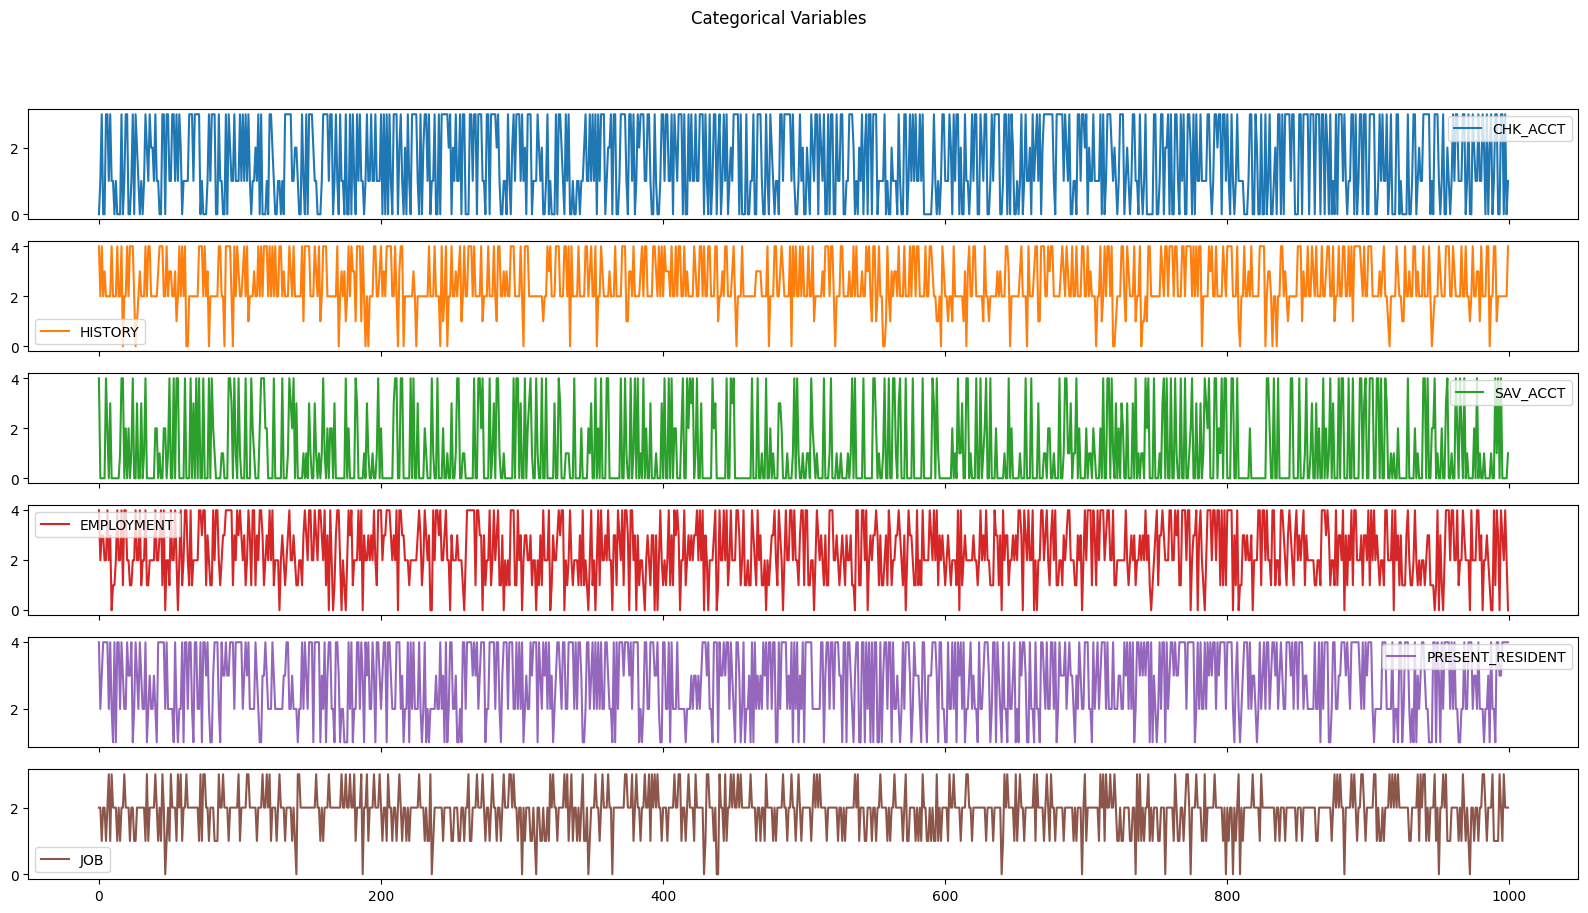

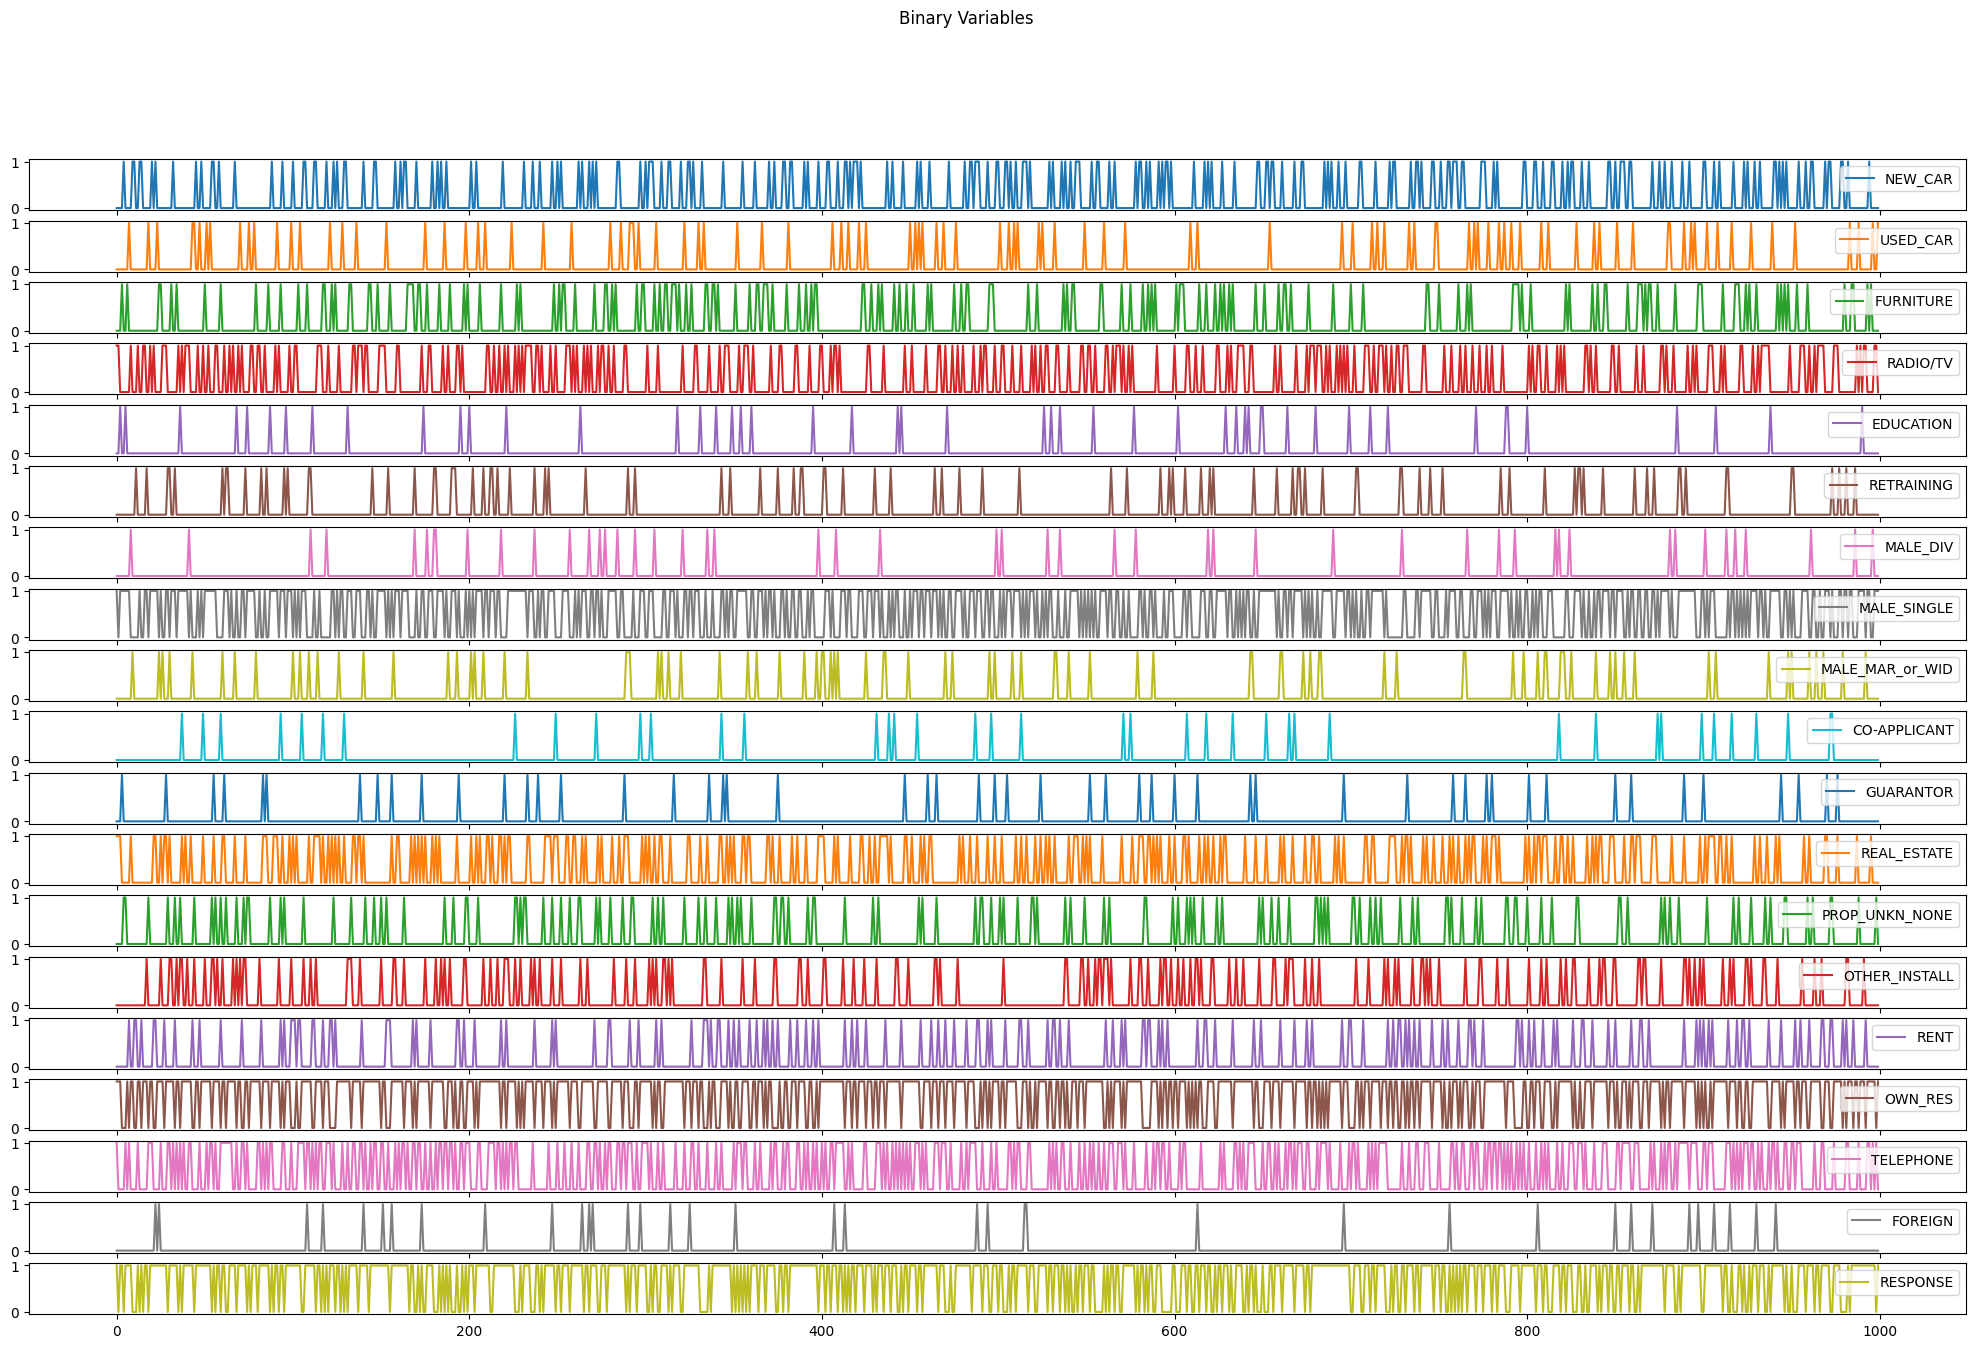

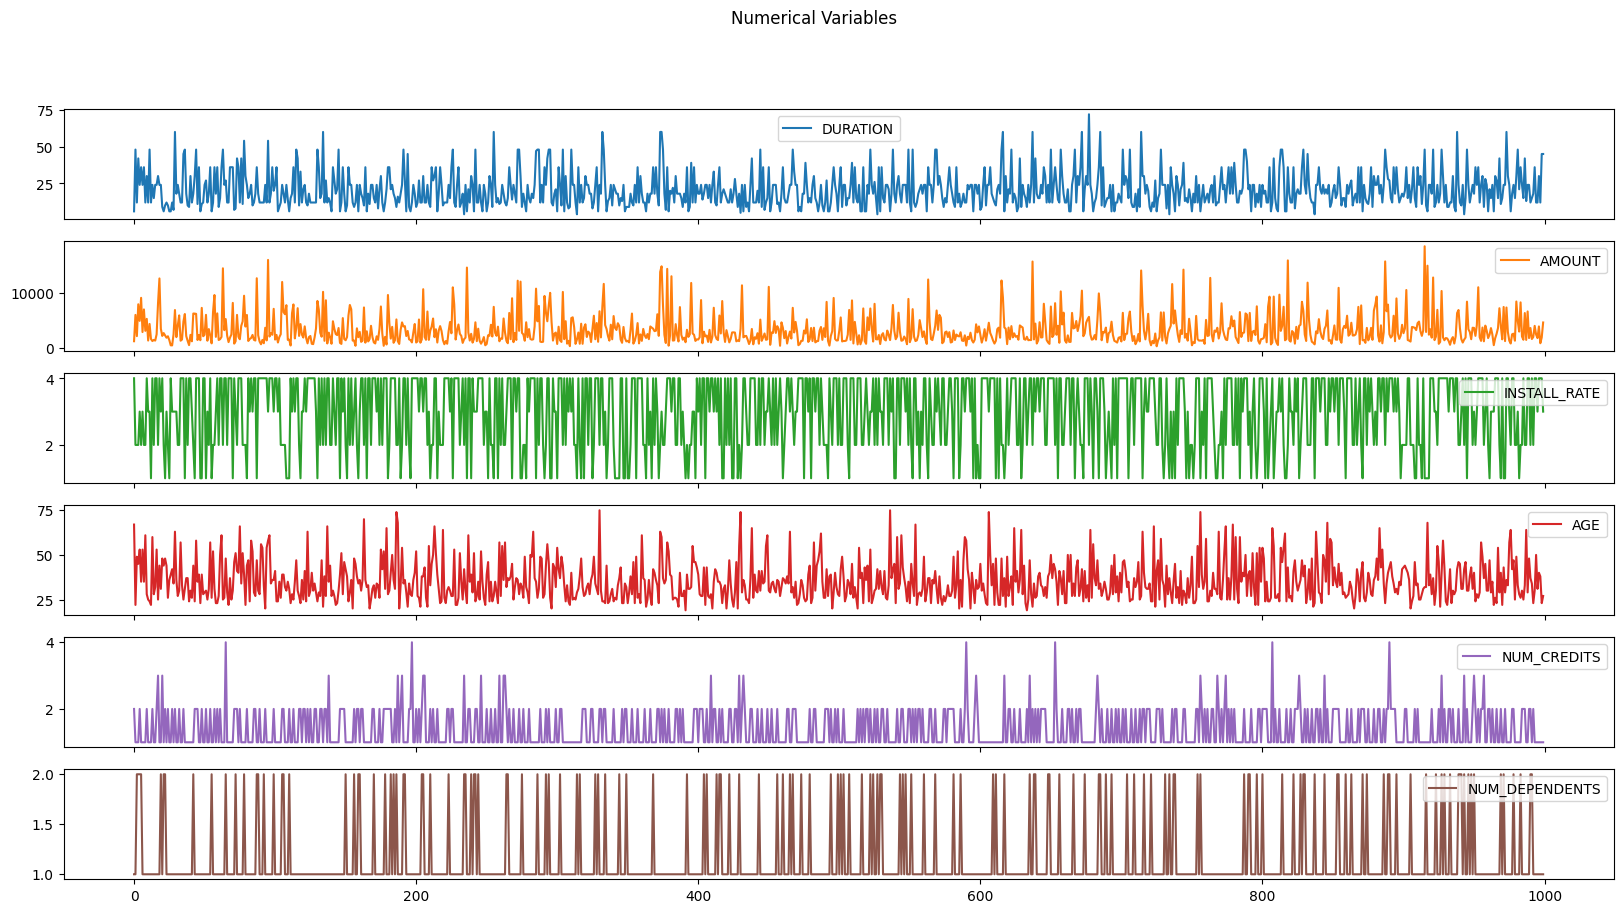

In [10]:
# There are too many variables to plot at once so lets categories by data type and then visualize
cat_df = raw_df[['CHK_ACCT','HISTORY','SAV_ACCT','EMPLOYMENT','PRESENT_RESIDENT','JOB']]
bin_df = raw_df[['NEW_CAR','USED_CAR','FURNITURE','RADIO/TV','EDUCATION','RETRAINING','MALE_DIV','MALE_SINGLE','MALE_MAR_or_WID','CO-APPLICANT','GUARANTOR','REAL_ESTATE','PROP_UNKN_NONE','OTHER_INSTALL','RENT','OWN_RES','TELEPHONE','FOREIGN','RESPONSE']]
num_df = raw_df[['DURATION','AMOUNT','INSTALL_RATE','AGE','NUM_CREDITS','NUM_DEPENDENTS']]

# Visualize
cat_df.plot(subplots = True, figsize = (20,10), title = 'Categorical Variables')
bin_df.plot(subplots= True, figsize=(25,15), title = 'Binary Variables')
num_df.plot(subplots=True,figsize=(20, 10), title = 'Numerical Variables')

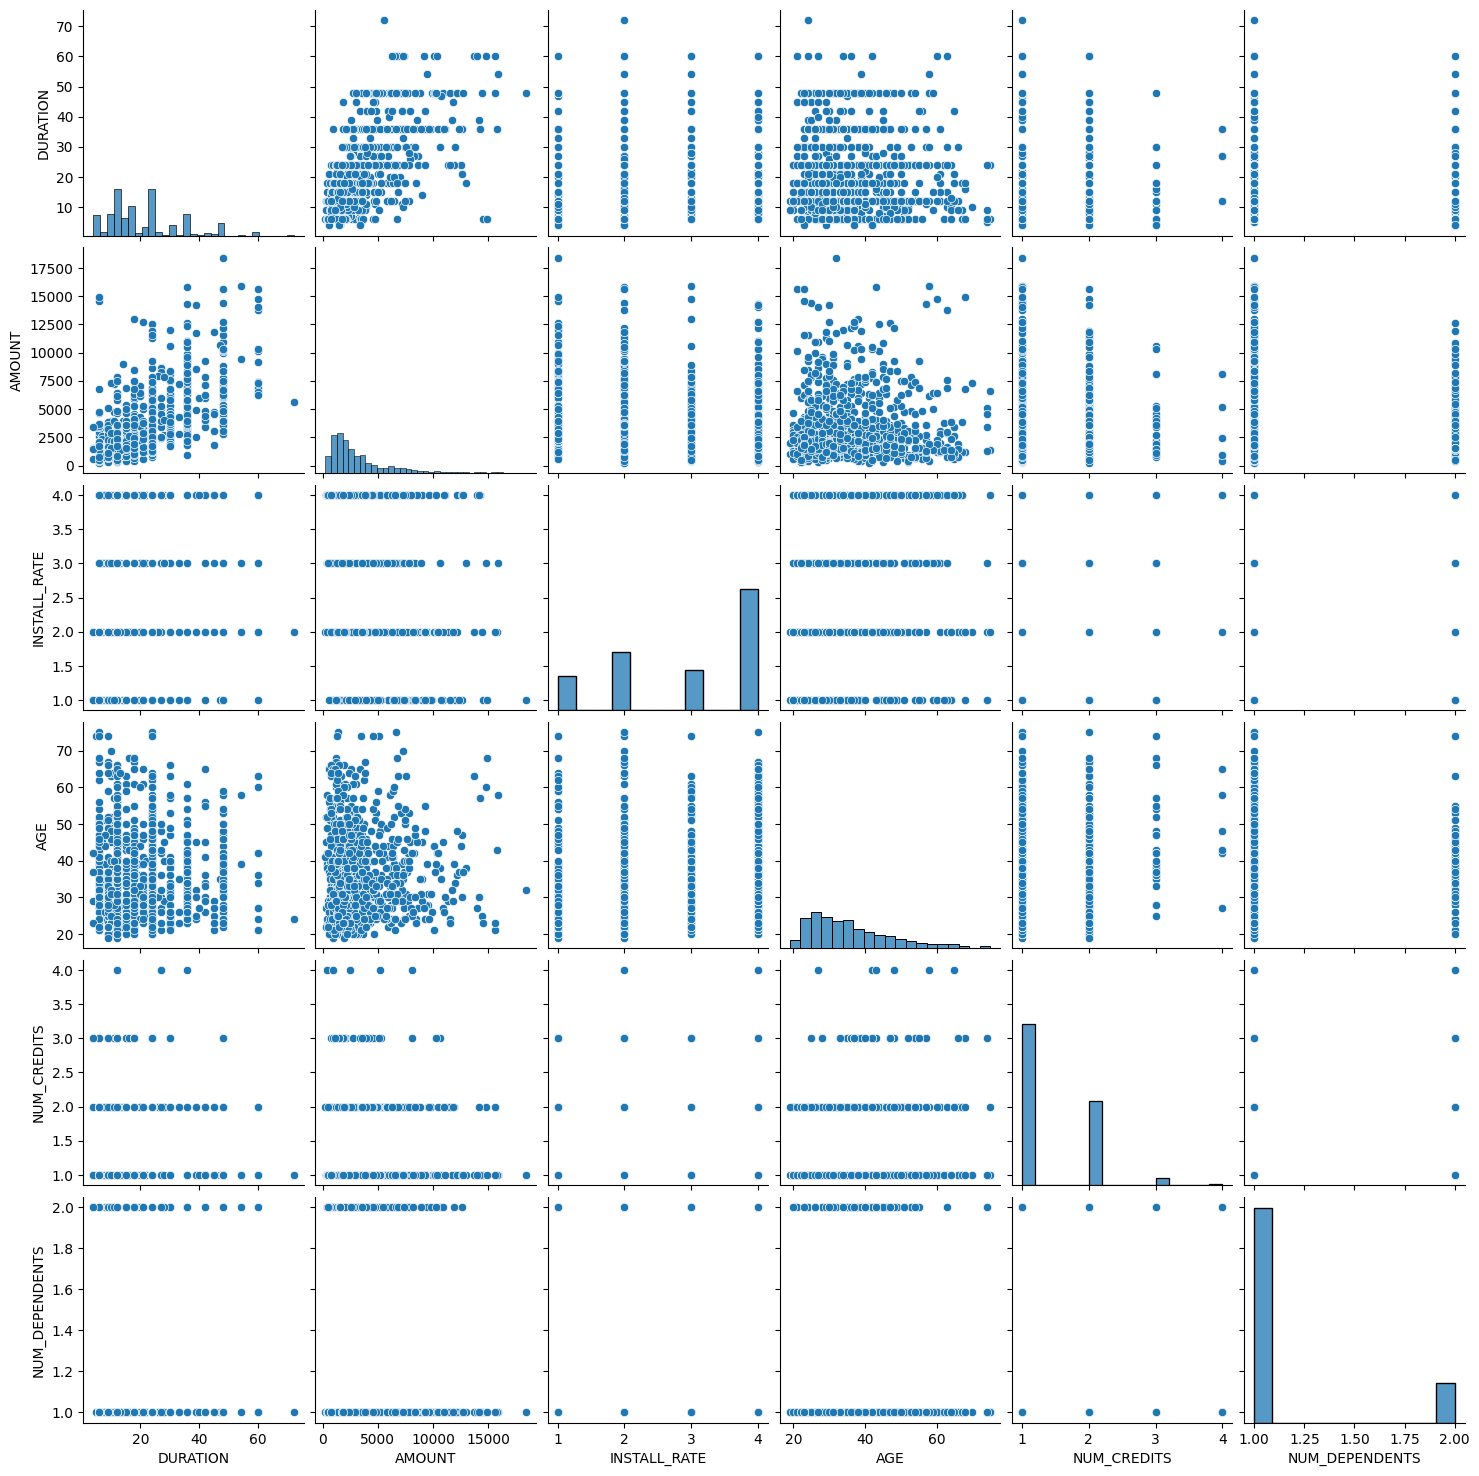

In [19]:
# Let's focus on the numerical variable in search of correlation , high cardinality, skewness and outliers! This impacts the model!
sns.pairplot(num_df)

In [37]:
# Lets see how correlated these two variables are. Meh not too strong of a correlation.
raw_df[['AMOUNT','DURATION']].corr()

,AMOUNT,DURATION
AMOUNT,1.000000,0.624984
DURATION,0.624984,1.000000


C:\Users\ALVARJX76\AppData\Local\Temp\ipykernel_11940\3154741137.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_df['AMOUNT'])


<AxesSubplot:xlabel='AMOUNT', ylabel='Density'>

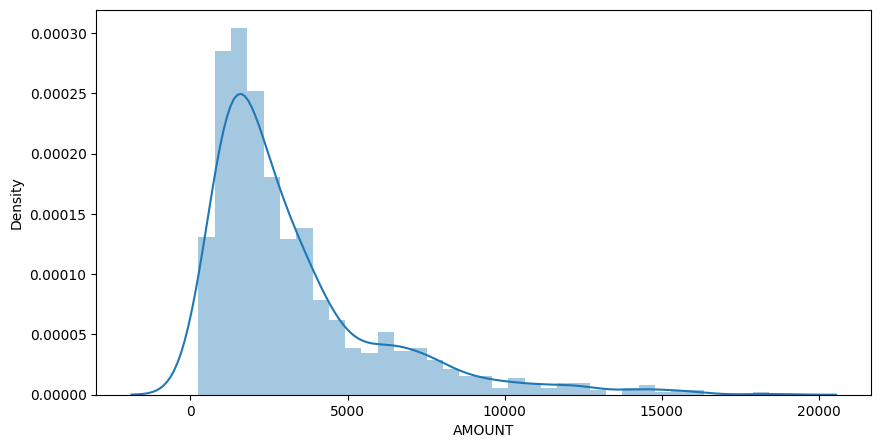

In [32]:
# This is an example of both high cardinality as well as strong positive skewness. How can we fix this? Square root transformation :)
plt.figure(figsize=(10,5))
sns.distplot(raw_df['AMOUNT'])

In [15]:
# We need to normalize some of the data that may have high cardinality. The AMOUNT variable is probably the worst offender. 
noid_df = raw_df.drop(columns = {'OBS#'})

# Apply square root transformation to these variables only
noid_df['AMOUNT'] = noid_df['AMOUNT'].apply(np.sqrt)
noid_df['DURATION'] = noid_df['DURATION'].apply(np.sqrt)
noid_df['INSTALL_RATE'] = noid_df['INSTALL_RATE'].apply(np.sqrt)
noid_df['AGE'] = noid_df['AGE'].apply(np.sqrt)
noid_df['NUM_CREDITS'] = noid_df['NUM_CREDITS'].apply(np.sqrt)
noid_df['NUM_DEPENDENTS'] = noid_df['NUM_DEPENDENTS'].apply(np.sqrt)

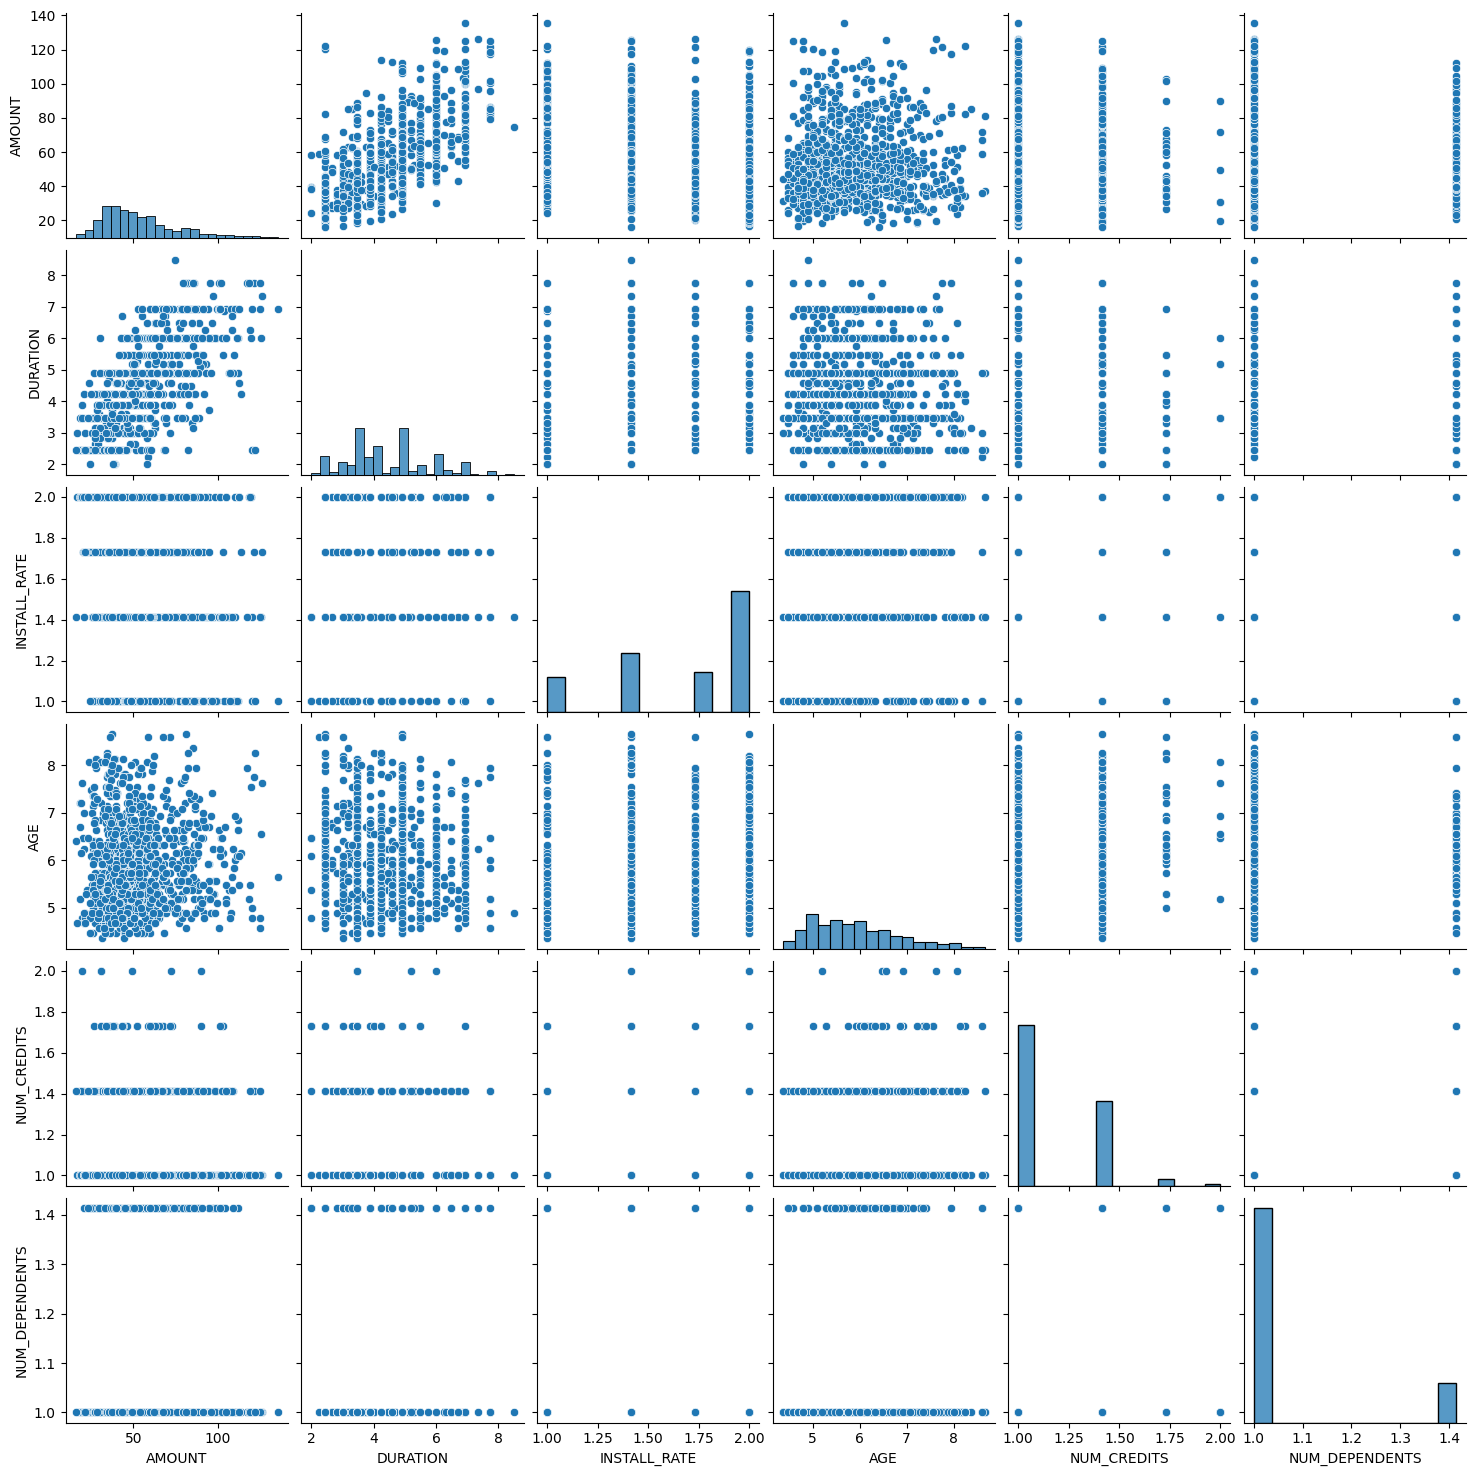

In [40]:
# pull just the normalized varialbes to visualize
normalizedvar = noid_df[['AMOUNT','DURATION','INSTALL_RATE','AGE','NUM_CREDITS','NUM_DEPENDENTS']]

# Visualize
sns.pairplot(normalizedvar)

## Data Partition Time!

In [43]:
# # We must cross-validate on training data. Let's use 70% of the training data for train and 30% to test against
# # Sklearn makes it easy with their train_test_split function. Remove Response for test
train_df = noid_df.loc[:, ~noid_df.columns.isin(['RESPONSE'])]
test_df = noid_df[['RESPONSE']]
X_train,X_test,Y_train,Y_test = train_test_split(train_df,test_df,test_size=0.3)

In [56]:
# Example of training set 
X_train


,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN
944,0,3.872983,2,0,0,1,0,0,0,42.953463,...,0,6.782330,0,1,0,1.000000,2,1.0,0,0
846,3,4.242641,2,1,0,0,0,0,0,82.225300,...,0,8.246211,0,1,0,1.414214,2,1.0,0,0
920,3,4.242641,4,0,0,1,0,0,0,42.626283,...,1,5.291503,0,0,1,1.414214,2,1.0,0,0
884,1,4.898979,2,0,0,1,0,0,0,63.694584,...,0,6.557439,0,0,1,1.000000,2,1.0,1,0
151,3,3.162278,2,0,0,0,1,0,0,43.863424,...,0,6.164414,0,0,1,1.000000,2,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,3,3.464102,2,0,0,0,1,0,0,35.524639,...,0,5.000000,0,0,1,1.000000,2,1.0,0,0
755,0,4.898979,2,1,0,0,0,0,0,35.846897,...,1,5.656854,0,1,0,1.000000,2,1.0,0,0
898,3,3.872983,2,0,0,1,0,0,0,46.754679,...,0,5.744563,1,1,0,1.000000,1,1.0,0,0
427,3,4.242641,4,0,0,0,1,0,0,33.896903,...,0,6.782330,0,0,1,1.414214,2,1.0,0,0


In [54]:
# Example of training set 
Y_train

,RESPONSE
944,1
846,0
920,1
884,0
151,1
...,...
52,1
755,0
898,1
427,1


In [55]:
# Lets make sure our training set is balanced enough
Y_train.sum()

RESPONSE    478
dtype: int64

## Lets build the predictive models!

In [44]:
# Lets use random forest model first
rfm = RandomForestClassifier(n_estimators = 200, random_state = 0, oob_score = True)
rfm.fit(X_train, Y_train)

C:\Users\ALVARJX76\AppData\Local\Temp\ipykernel_3932\1238846537.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfm.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=200, oob_score=True, random_state=0)

In [45]:
# Next Up a logistic regression model
lm = LogisticRegression()
lm.fit(X_train, Y_train)

C:\Users\ALVARJX76\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ALVARJX76\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
# Finally a simple neural network model
nnclf = MLPClassifier(random_state=1, max_iter=300)
nnclf.fit(X_train, Y_train)

C:\Users\ALVARJX76\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ALVARJX76\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1)

In [47]:
# Model Predictions
randforestpred = rfm.predict(X_test)
logpred = lm.predict(X_test)
nnpred = nnclf.predict(X_test)

# Model Accuracy scores
print('Random Forest Accuracy Score: ',accuracy_score(Y_test,  randforestpred))
print('Logistic Regression Score: ',accuracy_score(Y_test,  logpred))
print('Neural Network Score: ',accuracy_score(Y_test,  nnpred))


Random Forest Accuracy Score:  0.8
Logistic Regression Score:  0.81
Neural Network Score:  0.8033333333333333


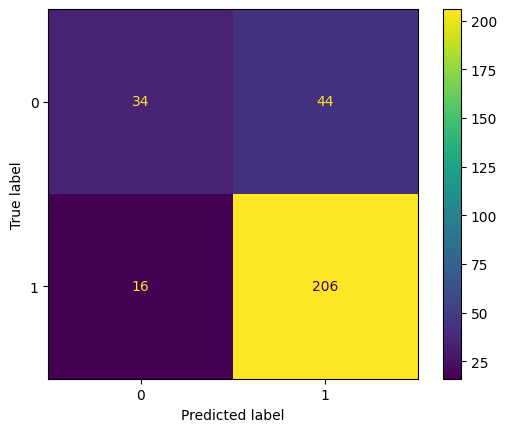

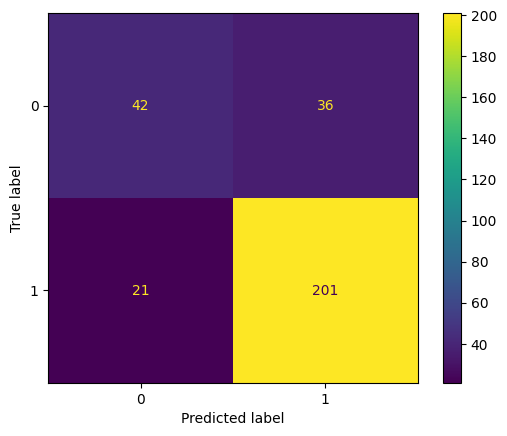

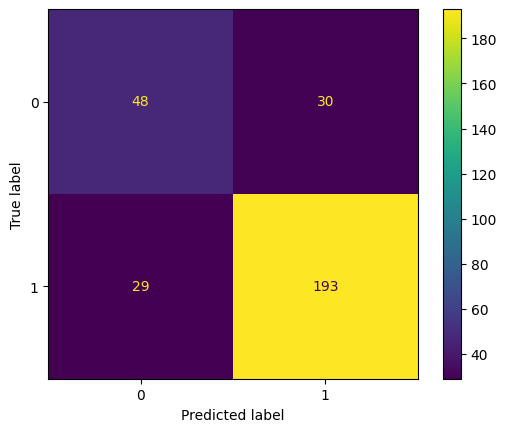

In [60]:
# Confusion matrices
# Random Forest
cm_rf = confusion_matrix(Y_test, randforestpred)
cmd_rf = ConfusionMatrixDisplay(cm_rf)
cmd_rf.plot()

# Logistic Regression
cm_log = confusion_matrix(Y_test, logpred)
cmd_log = ConfusionMatrixDisplay(cm_log)
cmd_log.plot()

# Neural Network
cm = confusion_matrix(Y_test, nnpred)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

In [74]:
# instead of taking the default classification, lets use the probabilities instead
lmprobpred = lm.predict_proba(X_test)[:,1] 

In [75]:
# Built a function that will calculate the net profit by row
def netprofit(row):
    if (row['PredictedClass'] == 1) & (row['ActualClass'] == 0):
        return -500
    elif (row['PredictedClass'] == 1) & (row['ActualClass'] == 1):
        return 100
    elif (row['PredictedClass'] == 0) & (row['ActualClass'] == 1):
        return 0 
    else:
        return 0

In [76]:
# Join probabilities, predicted class, actual class and net profit calculation
logcaldf = pd.DataFrame(lmprobpred)
final_df = pd.merge(logcaldf, pd.DataFrame(logpred), left_index=True, right_index=True)
final_df = pd.merge(final_df,Y_test.reset_index(drop = True), left_index=True, right_index=True)
final_df.columns =['LogProb', 'PredictedClass', 'ActualClass']
final_df['NetProfit'] = final_df.apply(netprofit, axis = 1)
final_df = final_df.sort_values(by=['LogProb'], ascending=False)
final_df['CumProfit'] = final_df['NetProfit'].cumsum()

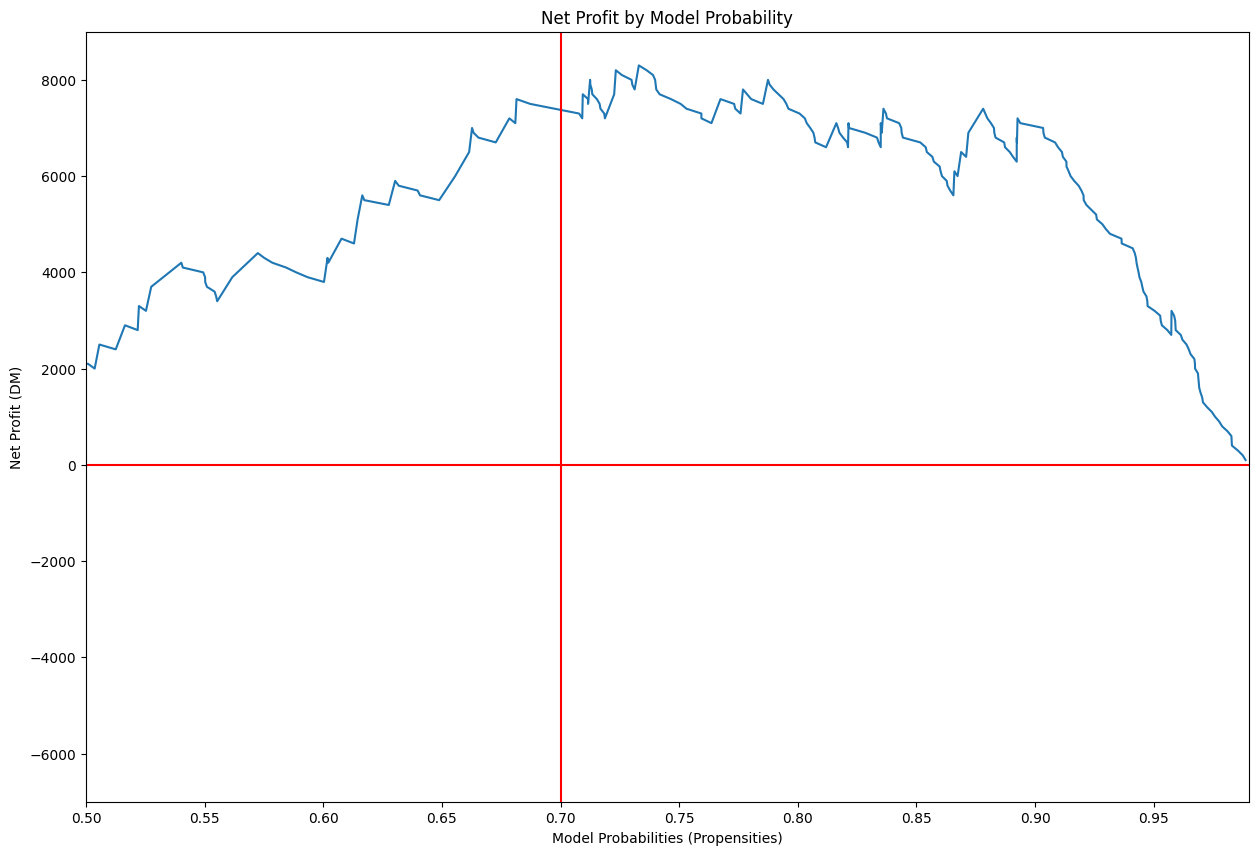

In [79]:
# Plot profitability versus logistic probabilites for ideal percentile

# Chart size
plt.figure(figsize=(15,10))
# Add Title and Axis names
plt.title('Net Profit by Model Probability')
plt.xlabel('Model Probabilities (Propensities)')
plt.ylabel('Net Profit (DM)')

# Add chart data focusing on 90th percentile
plt.plot(final_df['LogProb'].values, final_df['CumProfit'].values)
plt.hlines(0,0.50,0.99, color='red')
plt.vlines(0.70,-7000,9000, color='red')
plt.axis([.50,.99,  -7000, 9000])
plt.xticks(np.arange(.50, .99, .05))
plt.show()

In [ ]:
# convert original confusion matrix to net profit calc
prof_matrix = cm_log

# Set True Positives to average 100 DM per user
prof_matrix[1,1] = prof_matrix[1,1] * 100
# Set False Positives to net -500 DM per user
prof_matrix[0,1] = prof_matrix[0,1] * -500

# Calculate total net profit based on calculations
print('Total Net Profit for Model : ', prof_matrix[1,1] + prof_matrix[0,1], ' DM')

In [ ]:
final_df.to_csv('C:/Temp/logoutputnetprofit.csv')